In [2]:
###visualizaci{on del embedding space del VAE
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import  PCA
from mpl_toolkits.mplot3d import Axes3D
import librosa.display
import pickle

In [3]:
fx = ["Clean", "TubeScreamer", "BluesDriver", "RAT", "Chorus", "Phaser", "Flanger", "Tape Echo","Sweep Echo", "Digital Delay", "Hall Reverb", "PlateReverb", "Spring Reverb"]

In [4]:
####Visualización de los datos previo al VAE
with open('''waveforms.pkl''', 'rb') as f:
  waveforms = pickle.load(f)

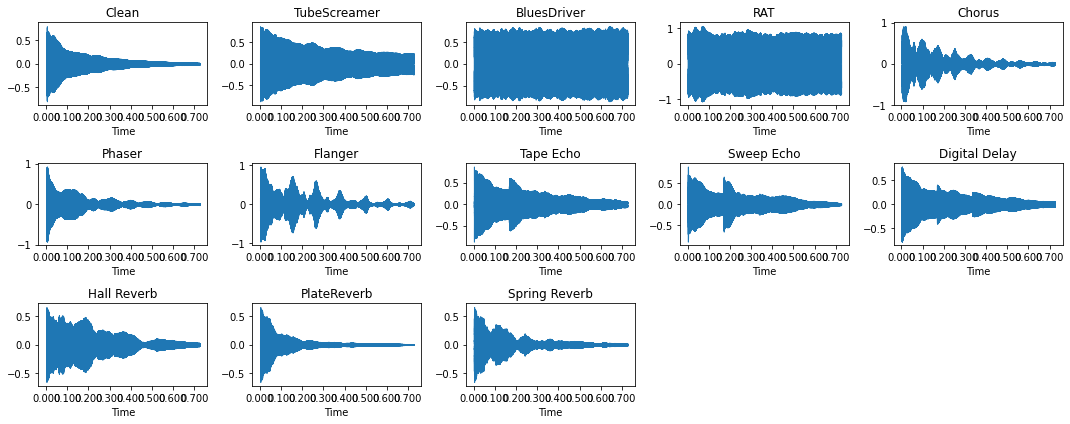

In [5]:

####visualización de los audios antes de normalizar
plt.figure(figsize=(15, 6))
sonidos = [i * 690 for i in range(13)]
for i, x in enumerate(sonidos):
    plt.subplot(3, 5, i+ 1).set_title(fx[i])
    librosa.display.waveshow(waveforms[x])
plt.tight_layout()
#plt.title("Waveforms")
plt.show()

In [6]:
#######PCA dominio de la frecuencia ####
fft_pca = []
for i in waveforms:
  x_fft = np.fft.fft(i)
  x_fft = librosa.amplitude_to_db(np.abs(i))
  fft_pca.append(x_fft)

fft_pca = np.array(fft_pca)

mu_fft = np.mean(fft_pca, axis = 0)
Xmu_fft = fft_pca - mu_fft
s_fft = np.std(fft_pca, axis = 0)
Xmu_FFT = Xmu_fft/s_fft

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\2634854044.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.4851443  0.02558833 0.00787431]


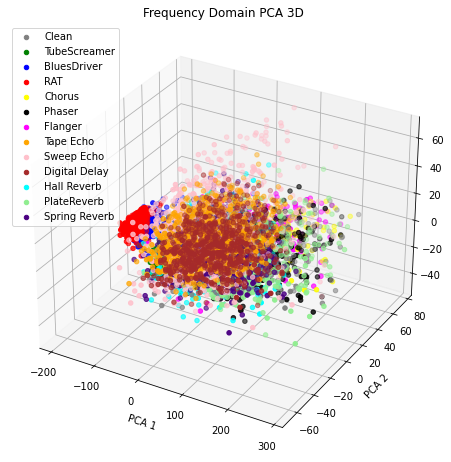

In [7]:
###visualización PCA
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(Xmu_FFT)
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='gray', label= fx[0])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label= fx[1])
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label= fx[2])
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='red', label= fx[3])
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label= fx[4])
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label= fx[5])
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='magenta', label= fx[6])
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label= fx[7])
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label= fx[8])
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label= fx[9])
ax.scatter3D(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1],X_PCA[6900:7589, 2], c='cyan', label= fx[10])
ax.scatter3D(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1],X_PCA[7590:8279, 2], c='lightgreen', label= fx[11])
ax.scatter3D(X_PCA[8280:, 0], X_PCA[8280:, 1],X_PCA[8280:, 2], c='indigo', label= fx[12])
fig.add_axes(ax)

plt.legend()
plt.title('Frequency Domain PCA 3D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

variance: 
[0.4851443  0.02558834]


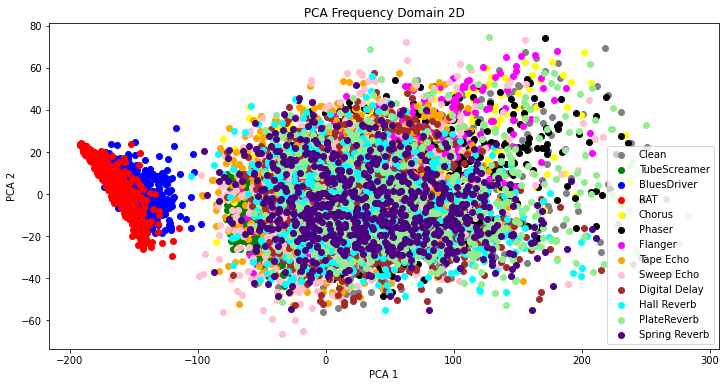

In [8]:
fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(Xmu_FFT)
print('variance: ')
print(pca.explained_variance_ratio_)

# "transform" the data that you want to reduce to "two components"
plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='gray', label= fx[0])
plt.scatter(X_PCA[690:1379, 0], X_PCA[690:1379, 1], c='green', label= fx[1])
plt.scatter(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1], c='blue', label= fx[2])
plt.scatter(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1], c='red', label= fx[3])
plt.scatter(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1], c='yellow', label= fx[4])
plt.scatter(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1], c='black', label= fx[5])
plt.scatter(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1], c='magenta', label= fx[6])
plt.scatter(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1], c='orange', label= fx[7])
plt.scatter(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1], c='pink', label= fx[8])
plt.scatter(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1], c='brown', label= fx[9])
plt.scatter(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1], c='cyan', label= fx[10])
plt.scatter(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1], c='lightgreen', label= fx[11])
plt.scatter(X_PCA[8280:, 0], X_PCA[8280:, 1], c='indigo', label= fx[12])

plt.legend()
plt.title('PCA Frequency Domain 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\3387116110.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.4851443  0.02558834 0.00787432]


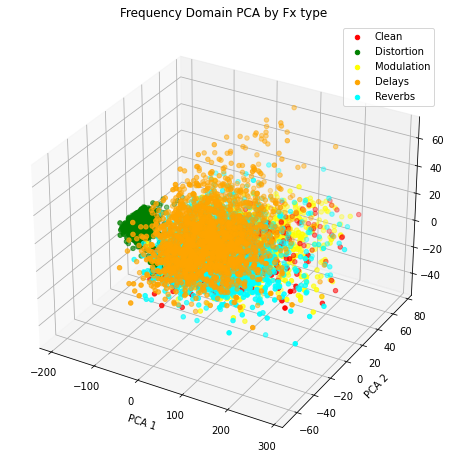

In [9]:
###visualización PCA
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(Xmu_FFT)
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label= fx[0])
ax.scatter3D(X_PCA[690:2759, 0], X_PCA[690:2759, 1],X_PCA[690:2759, 2], c='green', label= 'Distortion')
ax.scatter3D(X_PCA[2760:4829, 0], X_PCA[2760:4829, 1],X_PCA[2760:4829, 2], c='yellow', label= 'Modulation')
ax.scatter3D(X_PCA[4830:6899, 0], X_PCA[4830:6899, 1],X_PCA[4830:6899, 2], c='orange', label= 'Delays')
ax.scatter3D(X_PCA[6900:8969, 0], X_PCA[6900:8969, 1],X_PCA[6900:8969, 2], c='cyan', label= 'Reverbs')

plt.legend()
plt.title('Frequency Domain PCA by Fx type')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [10]:
with open('''latent_space_data.pkl''', 'rb') as g:
  latent = pickle.load(g)

c:\Users\LENOVO LEGION  Y720\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\LENOVO LEGION  Y720\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


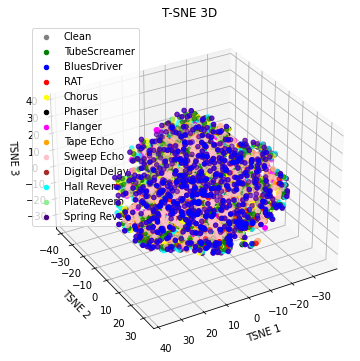

In [11]:
##ploting latent space with T-SNE
from sklearn.manifold import TSNE 

fig = plt.figure(1, figsize=(12, 6))
#a3x = Axes3D(fig,elev=-20, azim=100)
tsne = TSNE(n_components= 3)  # create an instance of t-SNE
ax = plt.axes(projection = "3d")
X_PCA = tsne.fit_transform(latent[0])  # fit and transform the data
ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='gray', label= fx[0])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label= fx[1])
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label= fx[2])
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='red', label= fx[3])
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label= fx[4])
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label= fx[5])
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='magenta', label= fx[6])
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label= fx[7])
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label= fx[8])
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label= fx[9])
ax.scatter3D(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1],X_PCA[6900:7589, 2], c='cyan', label= fx[10])
ax.scatter3D(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1],X_PCA[7590:8279, 2], c='lightgreen', label= fx[11])
ax.scatter3D(X_PCA[8280:, 0], X_PCA[8280:, 1],X_PCA[8280:, 2], c='indigo', label= fx[12])
ax.view_init(30,60)
plt.title('T-SNE 3D')
ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')
ax.legend()
plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\1567917241.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,elev=-0, azim=0)


variance: 
[0.04787924 0.03444482 0.02742764]


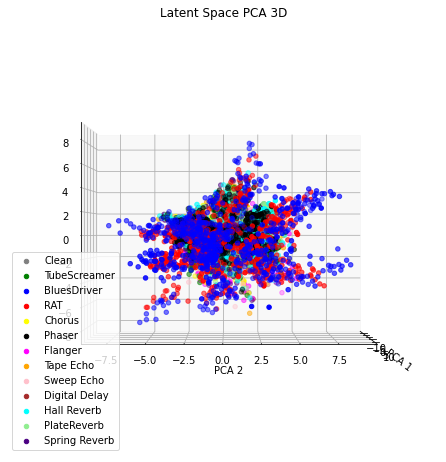

In [12]:
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig,elev=-0, azim=0)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

X_PCA = pca.fit_transform(latent[0])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='gray', label= fx[0])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label= fx[1])
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label= fx[2])
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='red', label= fx[3])
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label= fx[4])
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label= fx[5])
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='magenta', label= fx[6])
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label= fx[7])
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label= fx[8])
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label= fx[9])
ax.scatter3D(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1],X_PCA[6900:7589, 2], c='cyan', label= fx[10])
ax.scatter3D(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1],X_PCA[7590:8279, 2], c='lightgreen', label= fx[11])
ax.scatter3D(X_PCA[8280:, 0], X_PCA[8280:, 1],X_PCA[8280:, 2], c='indigo', label= fx[12])

plt.legend()
plt.title('Latent Space PCA 3D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
#plt.zlabel('PCA 3')

plt.show()

variance: 
[0.04787922 0.03444478]


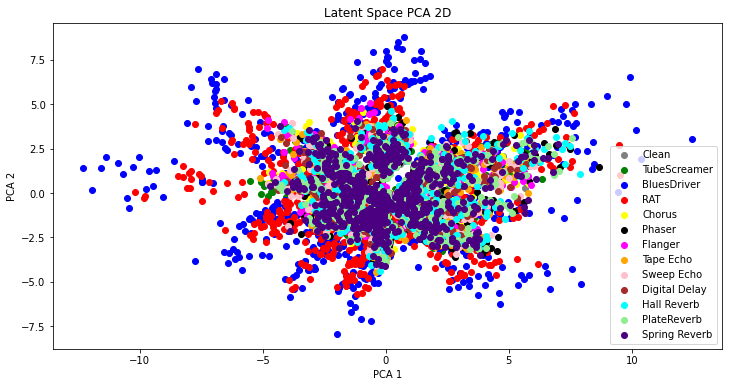

In [13]:
fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0])
print('variance: ')
print(pca.explained_variance_ratio_)

# "transform" the data that you want to reduce to "two components"
plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='gray', label= fx[0])
plt.scatter(X_PCA[690:1379, 0], X_PCA[690:1379, 1], c='green', label= fx[1])
plt.scatter(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1], c='blue', label= fx[2])
plt.scatter(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1], c='red', label= fx[3])
plt.scatter(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1], c='yellow', label= fx[4])
plt.scatter(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1], c='black', label= fx[5])
plt.scatter(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1], c='magenta', label= fx[6])
plt.scatter(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1], c='orange', label= fx[7])
plt.scatter(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1], c='pink', label= fx[8])
plt.scatter(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1], c='brown', label= fx[9])
plt.scatter(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1], c='cyan', label= fx[10])
plt.scatter(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1], c='lightgreen', label= fx[11])
plt.scatter(X_PCA[8280:, 0], X_PCA[8280:, 1], c='indigo', label= fx[12])

plt.legend()
plt.title('Latent Space PCA 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\4090391969.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.04787925 0.03444485 0.0274277 ]


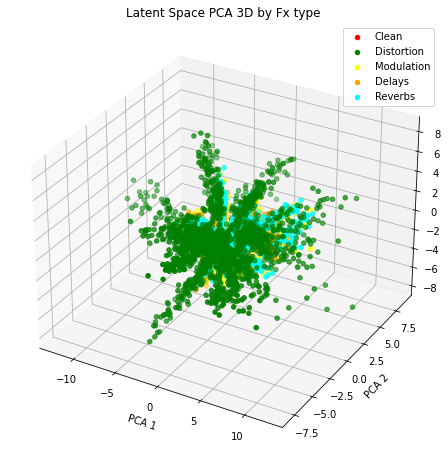

In [14]:
###visualización PCA
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label= fx[0])
ax.scatter3D(X_PCA[690:2759, 0], X_PCA[690:2759, 1],X_PCA[690:2759, 2], c='green', label= 'Distortion')
ax.scatter3D(X_PCA[2760:4829, 0], X_PCA[2760:4829, 1],X_PCA[2760:4829, 2], c='yellow', label= 'Modulation')
ax.scatter3D(X_PCA[4830:6899, 0], X_PCA[4830:6899, 1],X_PCA[4830:6899, 2], c='orange', label= 'Delays')
ax.scatter3D(X_PCA[6900:8969, 0], X_PCA[6900:8969, 1],X_PCA[6900:8969, 2], c='cyan', label= 'Reverbs')

plt.legend()
plt.title('Latent Space PCA 3D by Fx type')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

variance: 
[0.04787927 0.03444481]


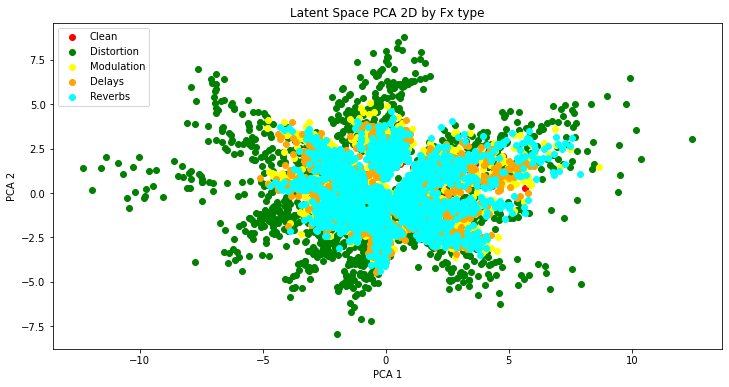

In [15]:
fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='red', label= fx[0])
plt.scatter(X_PCA[690:2759, 0], X_PCA[690:2759, 1], c='green', label= 'Distortion')
plt.scatter(X_PCA[2760:4829, 0], X_PCA[2760:4829, 1], c='yellow', label= 'Modulation')
plt.scatter(X_PCA[4830:6899, 0], X_PCA[4830:6899, 1], c='orange', label= 'Delays')
plt.scatter(X_PCA[6900:8969, 0], X_PCA[6900:8969, 1], c='cyan', label= 'Reverbs')

plt.legend()
plt.title('Latent Space PCA 2D by Fx type')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [16]:
########VISUALIZACIONES POR EFECTO#############

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\3911352274.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.06686862 0.05218256 0.03773614]


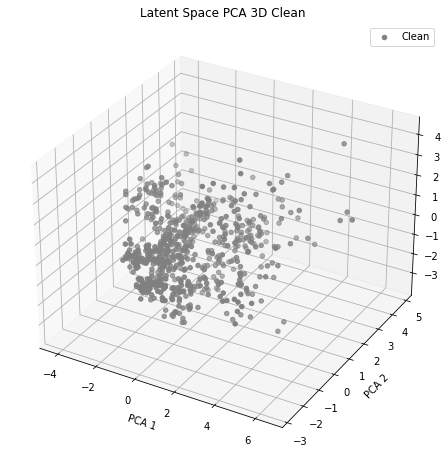

variance: 
[0.06686863 0.05218261]


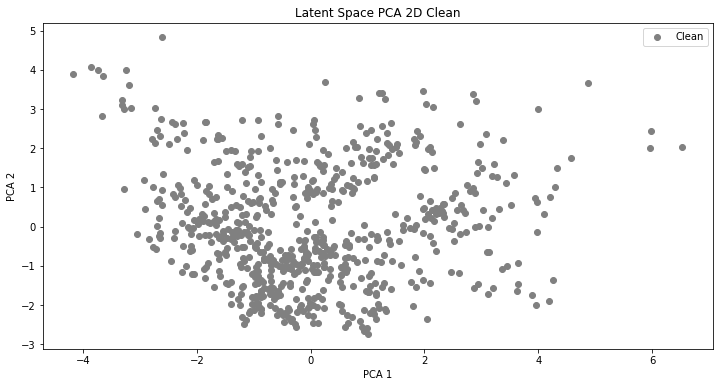

In [17]:
###visualización PCA 3D CLEAN

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][0:689])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='gray', label= fx[0])

plt.legend()
plt.title('Latent Space PCA 3D Clean')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###PCA 2D CLean

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][0:689])
print('variance: ')
print(pca.explained_variance_ratio_)

# "transform" the data that you want to reduce to "two components"
plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='gray', label= fx[0])


plt.legend()
plt.title('Latent Space PCA 2D Clean')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()




variance: 
[0.05801298 0.04381634 0.0346097 ]


C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\1663781214.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


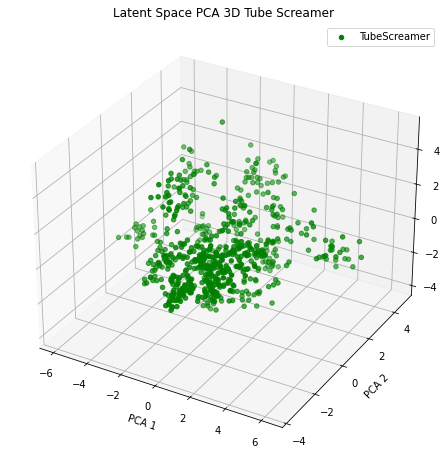

variance: 
[0.05801298 0.04381635]


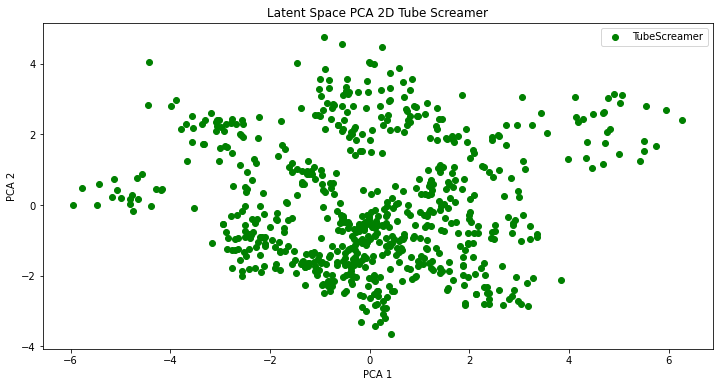

In [18]:
###visualización PCA 3D Tube Screamer

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "three components"

X_PCA = pca.fit_transform(latent[0][690:1379])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='green', label= fx[1])

#ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label=fx[1])

plt.legend()
plt.title('Latent Space PCA 3D Tube Screamer')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###PCA 2D TubeScreamer

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][690:1379])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='green', label= fx[1])

plt.legend()
plt.title('Latent Space PCA 2D Tube Screamer')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\2266446855.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.05596276 0.04177271 0.0339921 ]


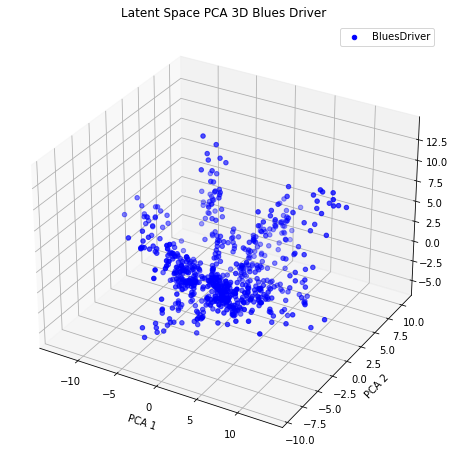

variance: 
[0.05596276 0.04177275]


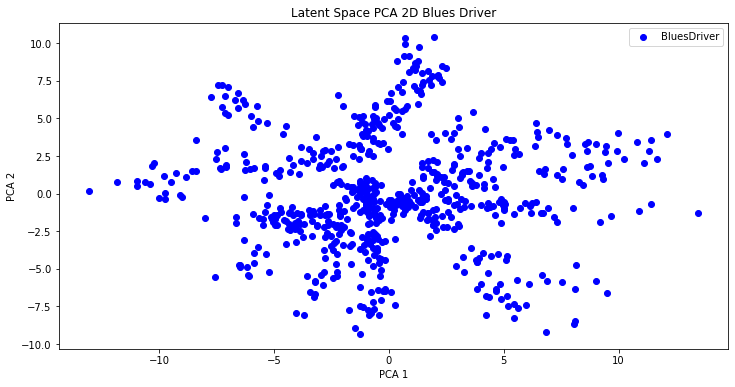

In [19]:
###visualización PCA 3D Blues Driver

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][1380:2069])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='blue', label= fx[2])

plt.legend()
plt.title('Latent Space PCA 3D Blues Driver')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Blues Driver

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][1380:2069])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='blue', label= fx[2])

plt.legend()
plt.title('Latent Space PCA 2D Blues Driver')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\928619765.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.05171389 0.03750136 0.02883621]


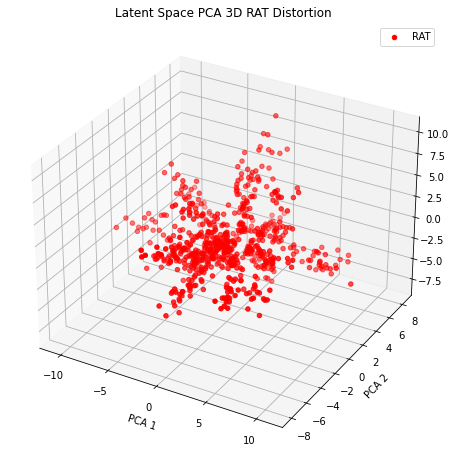

variance: 
[0.05171392 0.03750112]


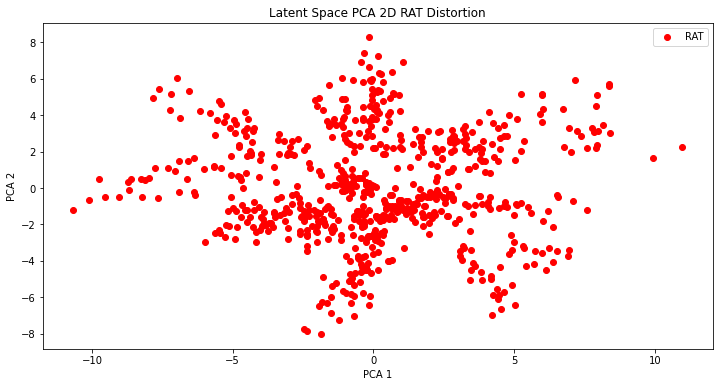

In [20]:
###visualización PCA 3D RAT Distortion

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][2070:2759])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label= fx[3])

plt.legend()
plt.title('Latent Space PCA 3D RAT Distortion')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Rat Distortion

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][2070:2759])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='red', label= fx[3])

plt.legend()
plt.title('Latent Space PCA 2D RAT Distortion')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

variance: 
[0.06231743 0.04184499 0.03690511]


C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\79700499.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


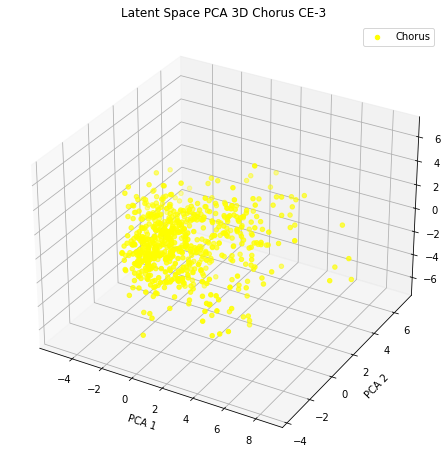

variance: 
[0.06231748 0.04184508]


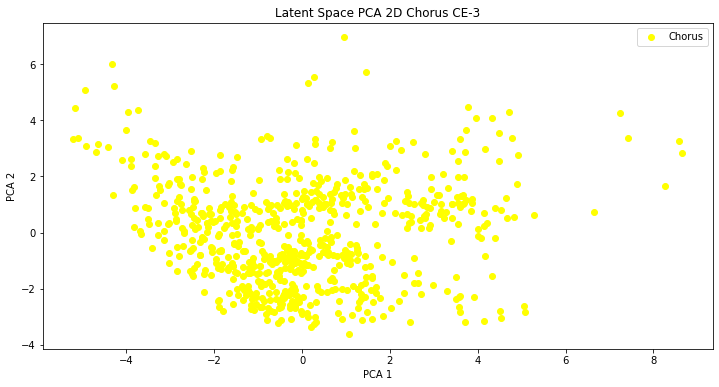

In [21]:
###visualización PCA 3D Chorus

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][2760:3449])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='yellow', label= fx[4])

plt.legend()
plt.title('Latent Space PCA 3D Chorus CE-3')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Chorus

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][2760:3449])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='yellow', label= fx[4])

plt.legend()
plt.title('Latent Space PCA 2D Chorus CE-3')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

variance: 
[0.07393469 0.04793753 0.03684558]


C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\1885588831.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


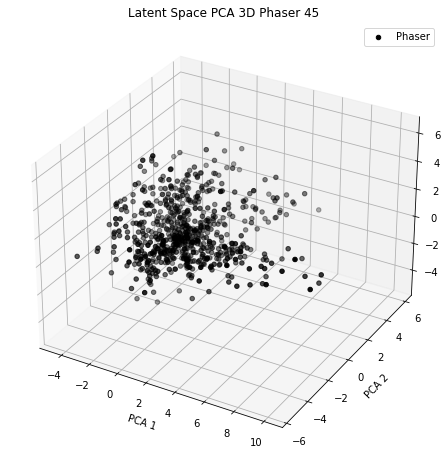

variance: 
[0.07393464 0.04793756]


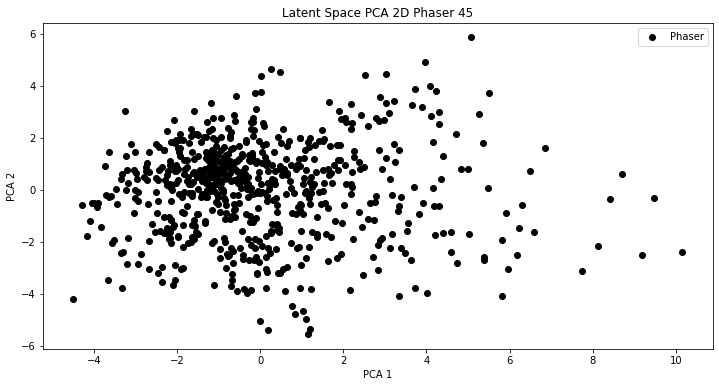

In [22]:
###visualización PCA 3D Phaser

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][3450:4139])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='black', label= fx[5])

plt.legend()
plt.title('Latent Space PCA 3D Phaser 45')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Phaser

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][3450:4139])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='black', label= fx[5])

plt.legend()
plt.title('Latent Space PCA 2D Phaser 45')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

variance: 
[0.0739347  0.04793758 0.03684558]


C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\1776198270.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


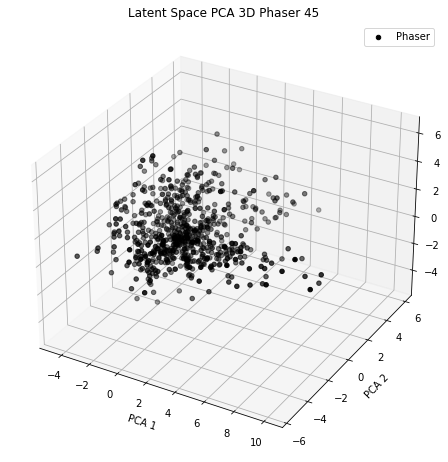

variance: 
[0.07393464 0.04793752]


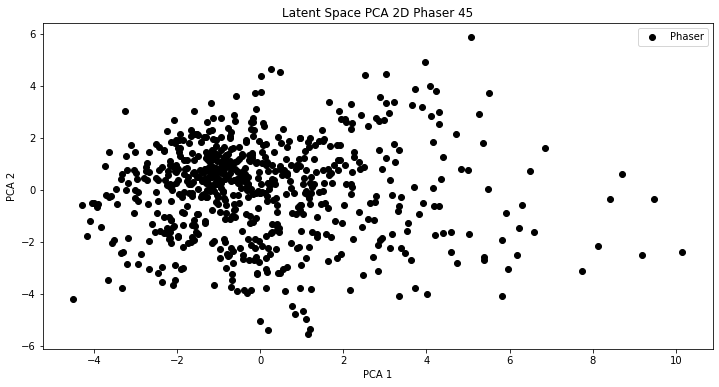

In [23]:
###visualización PCA 3D Flanger

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][3450:4139])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='black', label= fx[5])

plt.legend()
plt.title('Latent Space PCA 3D Phaser 45')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Flanger

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][3450:4139])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='black', label= fx[5])

plt.legend()
plt.title('Latent Space PCA 2D Phaser 45')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\4159052400.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.06367537 0.04220476 0.04130815]


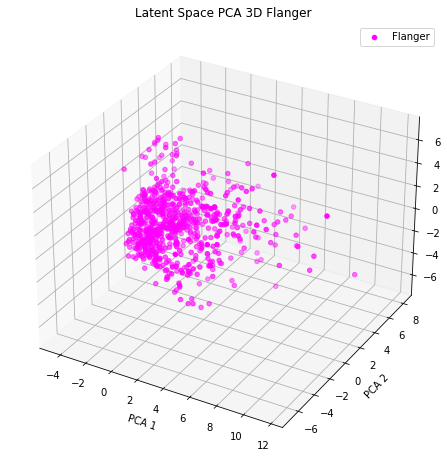

variance: 
[0.0636754  0.04220483]


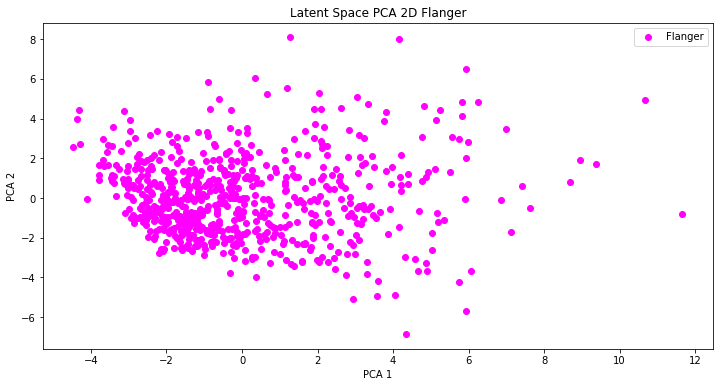

In [24]:
###visualización PCA 3D Flanger

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][4140:4829])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='magenta', label= fx[6])

plt.legend()
plt.title('Latent Space PCA 3D Flanger')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Flanger

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][4140:4829])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='magenta', label= fx[6])

plt.legend()
plt.title('Latent Space PCA 2D Flanger')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

variance: 
[0.06058678 0.04687331 0.0384939 ]


C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\2476627254.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


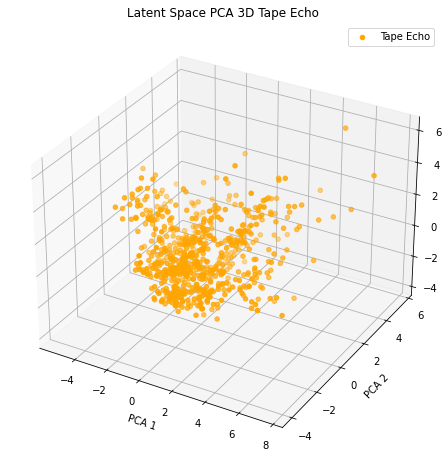

variance: 
[0.06058679 0.04687327]


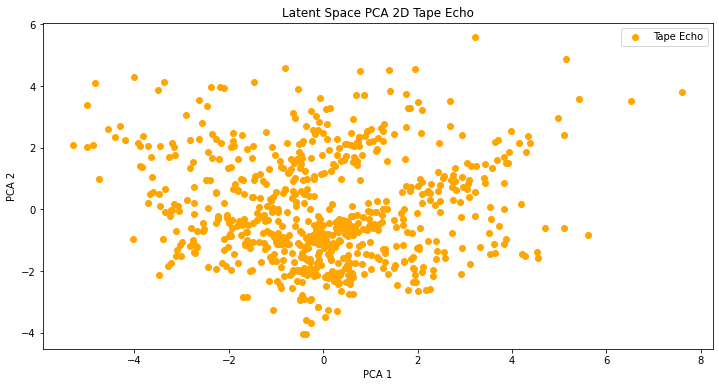

In [25]:
###visualización PCA 3D Tape Echo

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][4830:5519])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='orange', label= fx[7])

plt.legend()
plt.title('Latent Space PCA 3D Tape Echo')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Tape Echo

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][4830:5519])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='orange', label= fx[7])

plt.legend()
plt.title('Latent Space PCA 2D Tape Echo')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\628042839.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.05603452 0.04643735 0.03973403]


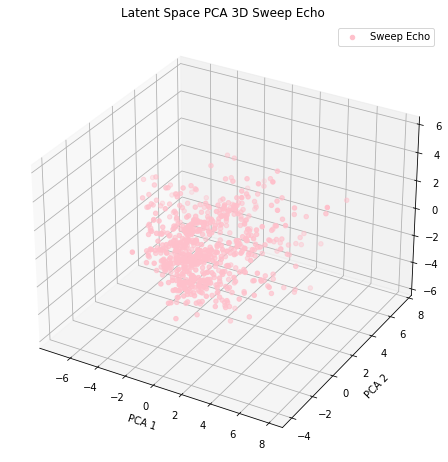

variance: 
[0.05603455 0.04643734]


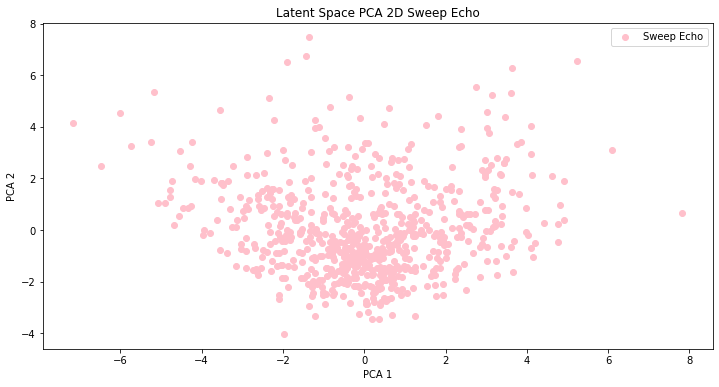

In [26]:
###visualización PCA 3D Sweep Echo

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][5520:6209])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='pink', label= fx[8])

plt.legend()
plt.title('Latent Space PCA 3D Sweep Echo')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Sweep Echo

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][5520:6209])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='pink', label= fx[8])

plt.legend()
plt.title('Latent Space PCA 2D Sweep Echo')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

variance: 
[0.06290671 0.04844389 0.03933525]


C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\131975985.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


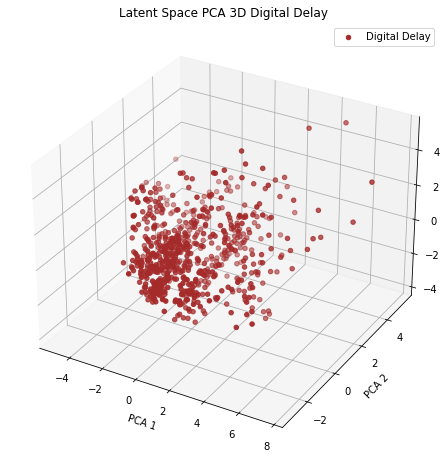

variance: 
[0.06290668 0.0484439 ]


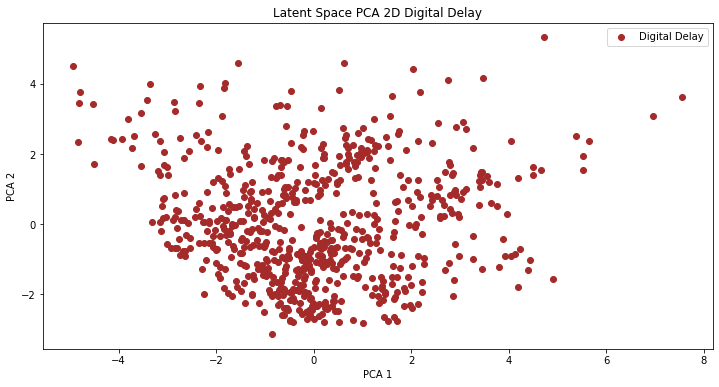

In [27]:
###visualización PCA 3D Digital Delay

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][6210:6899])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='brown', label= fx[9])

plt.legend()
plt.title('Latent Space PCA 3D Digital Delay')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Digital Delay

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][6210:6899])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='brown', label= fx[9])

plt.legend()
plt.title('Latent Space PCA 2D Digital Delay')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\2428485751.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.06545203 0.04541389 0.03905881]


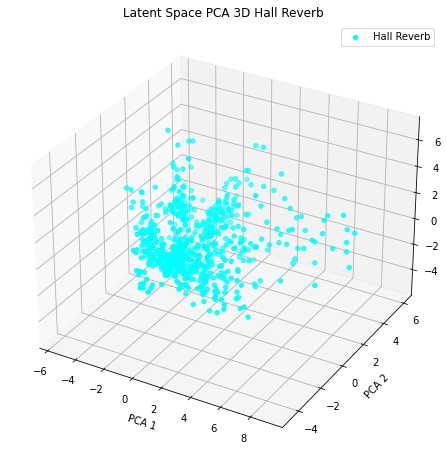

variance: 
[0.06545202 0.04541393]


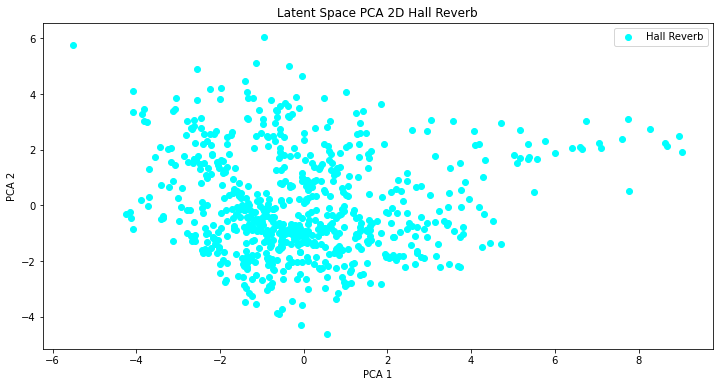

In [28]:
###visualización PCA 3D Hall Reverb

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][6900:7589])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='cyan', label= fx[10])

plt.legend()
plt.title('Latent Space PCA 3D Hall Reverb')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Hall Reverb

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][6900:7589])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='cyan', label= fx[10])

plt.legend()
plt.title('Latent Space PCA 2D Hall Reverb')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

variance: 
[0.07433683 0.04958172 0.03858406]


C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\90221689.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


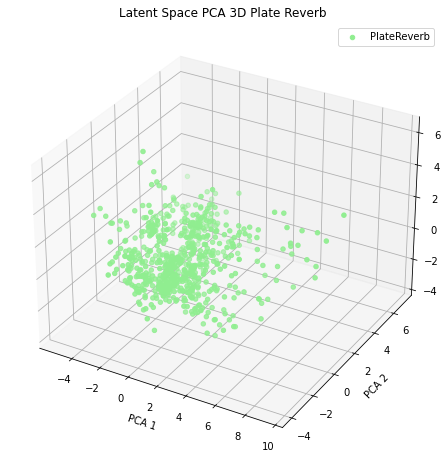

variance: 
[0.07433689 0.04958172]


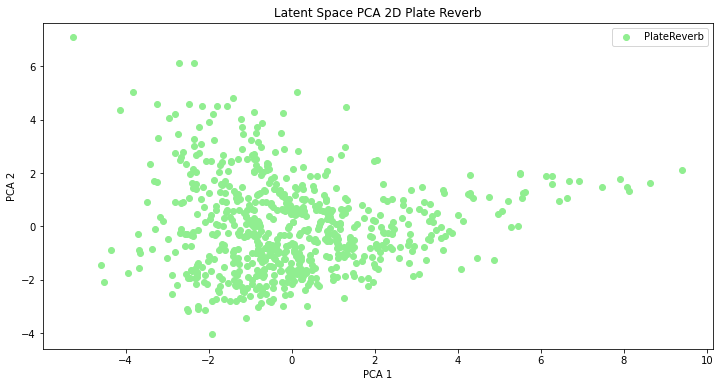

In [29]:
###visualización PCA 3D Plate Reverb

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][7590:8279])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='lightgreen', label= fx[11])

plt.legend()
plt.title('Latent Space PCA 3D Plate Reverb')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Plate Reverb

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][7590:8279])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='lightgreen', label= fx[11])

plt.legend()
plt.title('Latent Space PCA 2D Plate Reverb')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

variance: 
[0.0646791  0.04707354 0.03778852]


C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\3270800652.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


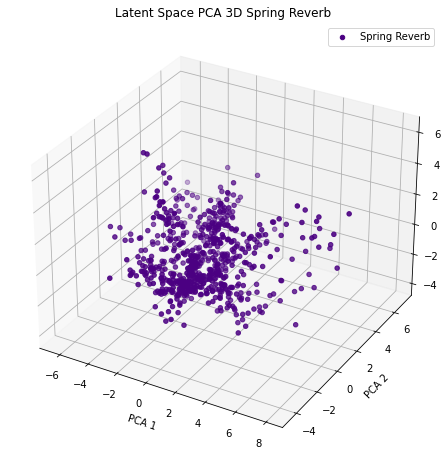

variance: 
[0.06467908 0.04707343]


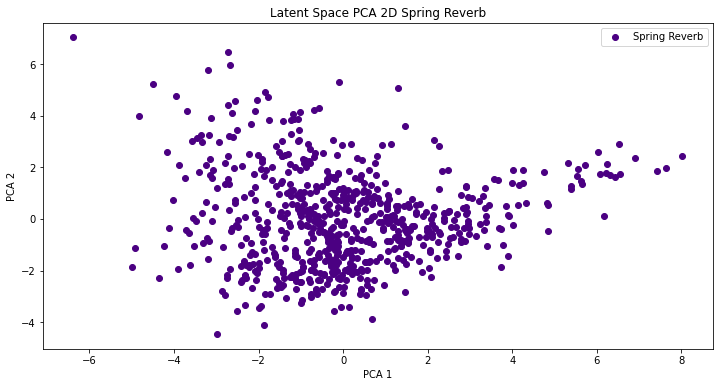

In [30]:
###visualización PCA 3D Spring Reverb

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][8280:])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='indigo', label= fx[12])

plt.legend()
plt.title('Latent Space PCA 3D Spring Reverb')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Spring Reverb

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][8280:])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='indigo', label= fx[12])

plt.legend()
plt.title('Latent Space PCA 2D Spring Reverb')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\2887145076.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.05193614 0.03836622 0.0295269 ]


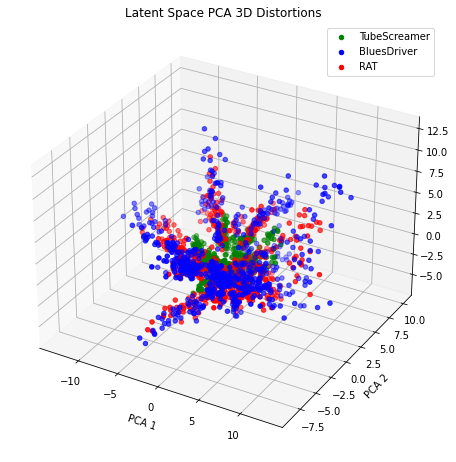

variance: 
[0.05193612 0.03836615]


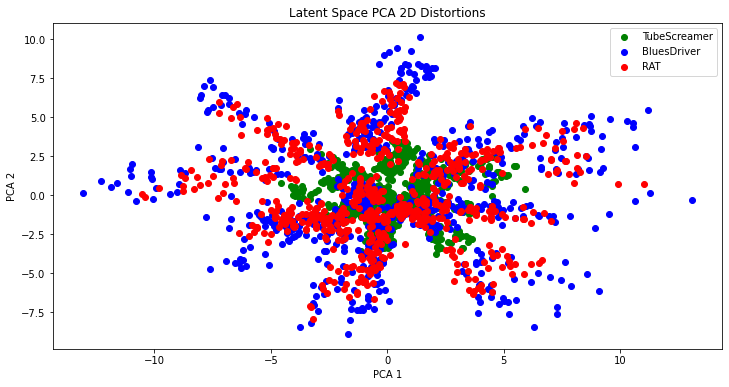

In [31]:
###visualización PCA 3D Distortions

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][690:2759])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='green', label= fx[1])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='blue', label= fx[2])
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='red', label= fx[3])

plt.legend()
plt.title('Latent Space PCA 3D Distortions')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Distortions

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][690:2759])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='green', label= fx[1])
plt.scatter(X_PCA[690:1379, 0], X_PCA[690:1379, 1], c='blue', label= fx[2])
plt.scatter(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1], c='red', label= fx[3])

plt.legend()
plt.title('Latent Space PCA 2D Distortions')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\2576603406.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.05833409 0.04266642 0.03409596]


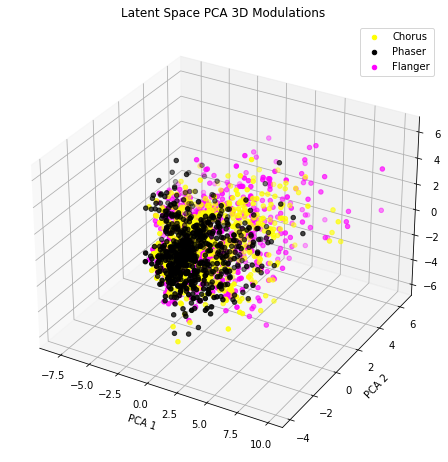

variance: 
[0.05833413 0.04266648]


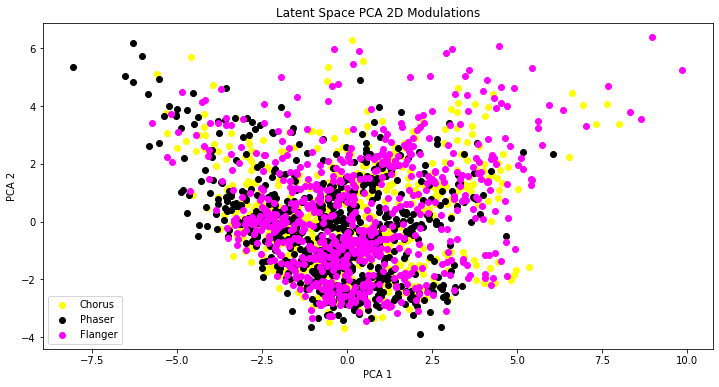

In [32]:
###visualización PCA 3D Modulations

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][2760:4829])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='yellow', label= fx[4])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='black', label= fx[5])
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='magenta', label= fx[6])

plt.legend()
plt.title('Latent Space PCA 3D Modulations')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Modulations

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][2760:4829])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='yellow', label= fx[4])
plt.scatter(X_PCA[690:1379, 0], X_PCA[690:1379, 1], c='black', label= fx[5])
plt.scatter(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1], c='magenta', label= fx[6])

plt.legend()
plt.title('Latent Space PCA 2D Modulations')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\2109347790.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.05824575 0.04523124 0.03637306]


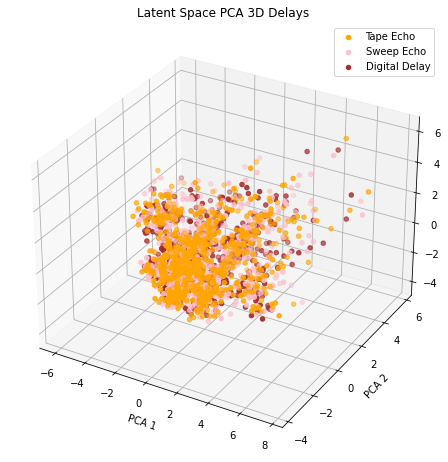

variance: 
[0.05824579 0.04523128]


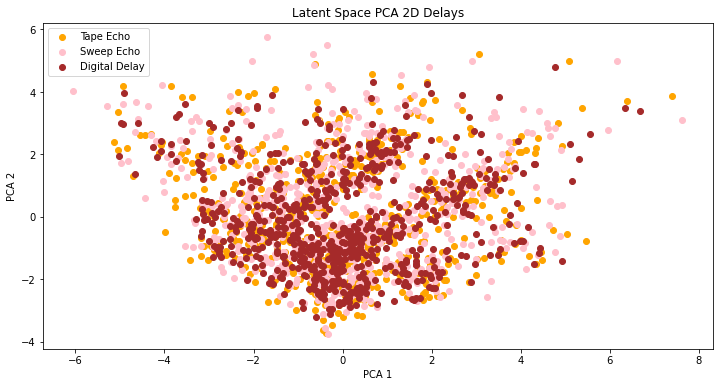

In [33]:
###visualización PCA 3D Delays

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][4830:6899])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='orange', label= fx[7])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='pink', label= fx[8])
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='brown', label= fx[9])

plt.legend()
plt.title('Latent Space PCA 3D Delays')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Delays

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][4830:6899])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='orange', label= fx[7])
plt.scatter(X_PCA[690:1379, 0], X_PCA[690:1379, 1], c='pink', label= fx[8])
plt.scatter(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1], c='brown', label= fx[9])

plt.legend()
plt.title('Latent Space PCA 2D Delays')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

C:\Users\LENOVO LEGION  Y720\AppData\Local\Temp\ipykernel_7444\1529864286.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.06685821 0.04600054 0.03790077]


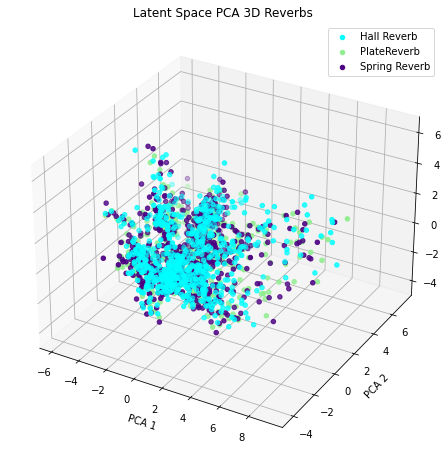

variance: 
[0.06685812 0.04600055]


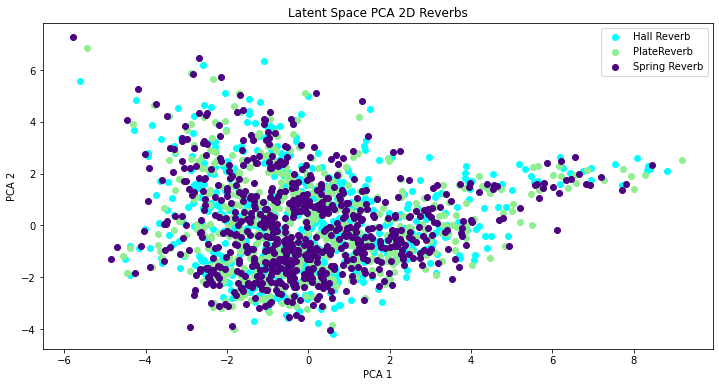

In [34]:
###visualización PCA 3D Reverbs

fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][6900:])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='cyan', label= fx[10])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='lightgreen', label= fx[11])
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='indigo', label= fx[12])

plt.legend()
plt.title('Latent Space PCA 3D Reverbs')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###visualización PCA 2D Reverbs

fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][6900:])
print('variance: ')
print(pca.explained_variance_ratio_)

plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='cyan', label= fx[10])
plt.scatter(X_PCA[690:1379, 0], X_PCA[690:1379, 1], c='lightgreen', label= fx[11])
plt.scatter(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1], c='indigo', label= fx[12])

plt.legend()
plt.title('Latent Space PCA 2D Reverbs')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()